<a href="https://colab.research.google.com/github/tianchu-shu/DistinctiveSchools/blob/master/Predicting_SpringCGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt  


from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import glob, os

data_dir= '/content/gdrive/My Drive/Prediction/'
os.chdir(data_dir)

In [0]:
#Import my own code
import pipeline as pp
from final import *

# Bigquery

In [5]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
#Getting the data for predicting spring CGP

%%bigquery --project ds-student-data df

SELECT *
FROM `ds-student-data.NweaAnalysis.RegressionforStoSGrowth`

In [7]:
df.shape

(78711, 11)

# Clean the data

In [13]:
df.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,SpringtoSpringConditionalGrowthPercentile,TestRITScore,RoundRIT
0,Winter 2019-2020,1113447494,Plymouth Educational Center,7,Mathematics,5,-2.75,NaN,50,NaN,197,200
1,Winter 2019-2020,1131079605,Plymouth Educational Center,6,Mathematics,0,0.79,NaN,45,NaN,167,170
2,Winter 2019-2020,1316769769,Plymouth Educational Center,7,Mathematics,0,NaN,NaN,50,NaN,186,190
3,Winter 2019-2020,145127957,Plymouth Educational Center,6,Mathematics,25,0.64,NaN,50,NaN,211,210
4,Winter 2019-2020,1494822297,Plymouth Educational Center,7,Mathematics,10,0.02,NaN,45,NaN,203,200


In [0]:
df['RoundRIT']= df['TestRITScore'].copy()

In [0]:
#Round the RIT Score to the nearest 10
df['RoundRIT'] = df['TestRITScore'].apply(lambda x: int(round(x/10.0)*10.0))

In [0]:
#round the testPercentile/PercentCorrect to nearest 5
df['TestPercentile'] = df['TestPercentile'].apply(lambda x: int(round(x/5.0)*5.0))

In [0]:
df['PercentCorrect'] = df['PercentCorrect'].apply(lambda x: int(round(x/5.0)*5.0))

In [0]:
spring = df[df['TermName'].str.contains("Spring")]

In [0]:
winter = df[df['TermName'].str.contains("Winter")]

In [16]:
winter['FtWCGI']=pd.qcut(winter['FalltoWinterConditionalGrowthIndex'], q=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
winter['WtWCGI']=pd.qcut(winter['WintertoWinterConditionalGrowthIndex'], q=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
spring.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,SpringtoSpringConditionalGrowthPercentile,TestRITScore,RoundRIT
2691,Spring 2012-2013,43633376,Irving Park,6,Mathematics,80,NaN,NaN,55,NaN,240,240
2692,Spring 2012-2013,43853260,Irving Park,6,Mathematics,90,NaN,NaN,50,NaN,246,250
2693,Spring 2012-2013,50086544,West Belden,6,Mathematics,40,NaN,NaN,50,NaN,222,220
2694,Spring 2012-2013,43523635,Bucktown,6,Mathematics,60,NaN,NaN,60,NaN,230,230
2695,Spring 2012-2013,43781405,Bucktown,7,Mathematics,55,NaN,NaN,55,NaN,231,230


In [0]:
ks = ['StudentID', 'Grade', 'Discipline','SpringtoSpringConditionalGrowthPercentile']

In [0]:
spring = spring[ks]

In [21]:
spring.shape

(35990, 4)

In [24]:
winter.shape

(42721, 13)

In [0]:
winter =winter.dropna(axis=1, how='all')

In [25]:
winter.tail()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
78496,Winter 2011-2012,50190246,Bucktown,1,Reading,15,-1.44,-0.08,55,157,160,"(-8.901, -1.12]","(-0.32, 0.29]"
78497,Winter 2011-2012,50146370,West Belden,1,Reading,10,-0.82,0.33,50,155,160,"(-1.12, -0.37]","(0.29, 1.03]"
78498,Winter 2011-2012,50134448,Bucktown,K,Reading,100,2.97,NaN,60,182,180,"(1.11, 11.88]",NaN
78499,Winter 2011-2012,50068383,Bucktown,1,Reading,15,-1.12,-0.43,50,157,160,"(-8.901, -1.12]","(-1.05, -0.32]"
78500,Winter 2011-2012,50094081,Irving Park,2,Reading,5,0.71,NaN,50,160,160,"(0.29, 1.11]",NaN


In [0]:
test2020 = winter[winter.TermName=='Winter 2019-2020']

In [0]:
rv = pd.merge(spring, winter, on=[ 'StudentID','Grade','Discipline'])

In [28]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
0,43633376,6,Mathematics,NaN,Winter 2012-2013,Irving Park,75,-0.40,NaN,55,234,230,"(-1.12, -0.37]",NaN
1,43853260,6,Mathematics,NaN,Winter 2012-2013,Irving Park,90,1.72,NaN,55,241,240,"(1.11, 11.88]",NaN
2,50086544,6,Mathematics,NaN,Winter 2012-2013,West Belden,20,-1.11,NaN,50,209,210,"(-1.12, -0.37]",NaN
3,43523635,6,Mathematics,NaN,Winter 2012-2013,Bucktown,45,0.10,NaN,50,220,220,"(-0.37, 0.29]",NaN
4,43781405,7,Mathematics,NaN,Winter 2012-2013,Bucktown,45,-1.06,NaN,50,225,220,"(-1.12, -0.37]",NaN


In [29]:
test2020.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
test2020.shape

(4628, 13)

In [0]:
test2020.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,WtWCGI,FtWCGI
579,Winter 2019-2020,2909817682,Plymouth Educational Center,7,Reading,80,0.62,0.10,50,229,230,"(-0.31, 0.3]","(0.3, 1.12]"
580,Winter 2019-2020,3496323659,Plymouth Educational Center,8,Reading,55,-0.23,-0.94,55,222,220,"(-1.05, -0.31]","(-0.37, 0.3]"
581,Winter 2019-2020,1502579005,Plymouth Educational Center,8,Reading,60,-0.52,-0.01,45,223,220,"(-0.31, 0.3]","(-1.12, -0.37]"
582,Winter 2019-2020,172550261,Plymouth Educational Center,8,Reading,50,-0.13,-0.73,50,219,220,"(-1.05, -0.31]","(-0.37, 0.3]"
583,Winter 2019-2020,1974001148,Plymouth Educational Center,7,Reading,55,0.27,-0.72,55,218,220,"(-1.05, -0.31]","(-0.37, 0.3]"


In [0]:
rv.dropna(inplace=True)

In [32]:
rv.shape

(28869, 14)

In [33]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
31,43273221,8,Mathematics,22.0,Winter 2012-2013,West Belden,90,0.65,0.95,55,252,250,"(0.29, 1.11]","(0.29, 1.03]"
32,43050370,8,Mathematics,19.0,Winter 2012-2013,West Belden,85,1.86,2.41,50,250,250,"(1.11, 11.88]","(1.03, 13.54]"
33,44277530,6,Mathematics,17.0,Winter 2012-2013,Bucktown,90,-1.51,-0.30,50,241,240,"(-8.901, -1.12]","(-0.32, 0.29]"
34,43345087,8,Mathematics,20.0,Winter 2012-2013,West Belden,80,-0.62,-0.75,50,245,240,"(-1.12, -0.37]","(-1.05, -0.32]"
35,43371657,8,Mathematics,13.0,Winter 2012-2013,West Belden,85,1.14,0.62,50,247,250,"(1.11, 11.88]","(0.29, 1.03]"


In [0]:
rv.to_csv('cleaned_data.csv', index=False)

# Read the clean data from here

In [0]:
#rv = pd.read_csv('cleaned_data.csv')

In [0]:
rv.shape

(28869, 14)

In [0]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
31,43273221,8,Mathematics,22.0,Winter 2012-2013,West Belden,90,0.65,0.95,55,252,250,"(0.23, 1.0]","(0.32, 1.04]"
32,43050370,8,Mathematics,19.0,Winter 2012-2013,West Belden,85,1.86,2.41,50,250,250,"(1.0, 11.41]","(1.04, 13.54]"
33,44277530,6,Mathematics,17.0,Winter 2012-2013,Bucktown,90,-1.51,-0.30,50,241,240,"(-8.901, -1.15]","(-1.03, -0.3]"
34,43345087,8,Mathematics,20.0,Winter 2012-2013,West Belden,80,-0.62,-0.75,50,245,240,"(-1.15, -0.42]","(-1.03, -0.3]"
35,43371657,8,Mathematics,13.0,Winter 2012-2013,West Belden,85,1.14,0.62,50,247,250,"(1.0, 11.41]","(0.32, 1.04]"


In [34]:
rv['SpringtoSpringConditionalGrowthPercentile'].head()

31    22.0
32    19.0
33    17.0
34    20.0
35    13.0
Name: SpringtoSpringConditionalGrowthPercentile, dtype: float64

In [0]:
#bins the waittime by 20% of the data
PBINS = [0, 20, 40, 60, 80, 100]
LABLES = [0,1,2,3,4]

In [0]:
rv.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,Y,FtWCGI,WtWCGI
0,43273221,8,Mathematics,22.0,Winter 2012-2013,West Belden,90,0.65,0.95,55,252,250,1,"(0.23, 1.0]","(0.32, 1.04]"
1,43050370,8,Mathematics,19.0,Winter 2012-2013,West Belden,85,1.86,2.41,50,250,250,1,"(1.0, 11.41]","(1.04, 13.54]"
2,44277530,6,Mathematics,17.0,Winter 2012-2013,Bucktown,90,-1.51,-0.30,50,241,240,1,"(-8.901, -1.15]","(-1.03, -0.3]"
3,43345087,8,Mathematics,20.0,Winter 2012-2013,West Belden,80,-0.62,-0.75,50,245,240,1,"(-1.15, -0.42]","(-1.03, -0.3]"
4,43371657,8,Mathematics,13.0,Winter 2012-2013,West Belden,85,1.14,0.62,50,247,250,1,"(1.0, 11.41]","(0.32, 1.04]"


In [0]:
#Save a clean copy for later viz purpose

viz_df = rv.copy()

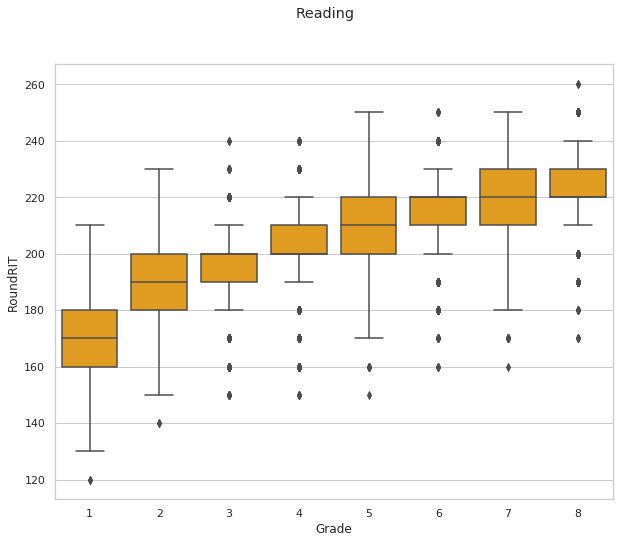

In [0]:
'''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('Reading')
sns.boxplot( x=read['Grade'], y=read["RoundRIT"], color="orange")
#sns.plt.show()
'''

In [42]:
rv.tail()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
35853,50067284,1,Reading,50.0,Winter 2011-2012,Irving Park,75,0.45,1.15,60,181,180,"(0.29, 1.11]","(1.03, 13.54]"
35854,50078972,1,Reading,56.0,Winter 2011-2012,West Belden,65,0.24,0.71,50,176,180,"(-0.37, 0.29]","(0.29, 1.03]"
35855,50134906,1,Reading,61.0,Winter 2011-2012,Bucktown,60,1.20,0.00,55,175,180,"(1.11, 11.88]","(-0.32, 0.29]"
35856,50136564,1,Reading,71.0,Winter 2011-2012,Irving Park,95,0.59,-0.19,65,191,190,"(0.29, 1.11]","(-0.32, 0.29]"
35857,50167001,1,Reading,63.0,Winter 2011-2012,Irving Park,95,-1.26,0.64,65,193,190,"(-8.901, -1.12]","(0.29, 1.03]"


In [38]:
whole =pd.concat([rv, test2020], axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [151]:
test2020.shape

(4628, 13)

In [39]:
whole.shape

(33497, 14)

In [44]:
whole.head()

,Discipline,FalltoWinterConditionalGrowthIndex,FtWCGI,Grade,PercentCorrect,RoundRIT,SchoolName,SpringtoSpringConditionalGrowthPercentile,StudentID,TermName,TestPercentile,TestRITScore,WintertoWinterConditionalGrowthIndex,WtWCGI
31,Mathematics,0.65,"(0.29, 1.11]",8,55,250,West Belden,22.0,43273221,Winter 2012-2013,90,252,0.95,"(0.29, 1.03]"
32,Mathematics,1.86,"(1.11, 11.88]",8,50,250,West Belden,19.0,43050370,Winter 2012-2013,85,250,2.41,"(1.03, 13.54]"
33,Mathematics,-1.51,"(-8.901, -1.12]",6,50,240,Bucktown,17.0,44277530,Winter 2012-2013,90,241,-0.30,"(-0.32, 0.29]"
34,Mathematics,-0.62,"(-1.12, -0.37]",8,50,240,West Belden,20.0,43345087,Winter 2012-2013,80,245,-0.75,"(-1.05, -0.32]"
35,Mathematics,1.14,"(1.11, 11.88]",8,50,250,West Belden,13.0,43371657,Winter 2012-2013,85,247,0.62,"(0.29, 1.03]"


# Pre-processing

In [0]:
keep =['Grade', 'SchoolName', 'TestPercentile', 'WtWCGI', 'FtWCGI','PercentCorrect',
       'RoundRIT']

In [48]:
read.shape

(16719, 14)

In [0]:
read =whole[whole.Discipline=='Reading']
math =whole[whole.Discipline=='Mathematics']
rd =whole[whole.Discipline=='Reading']
md =whole[whole.Discipline=='Mathematics']

In [0]:
read = read[keep]
math = math[keep]

In [50]:
# CREATING DUMMIES
print ('The following columns have been broken into dummies:' , keep)
for dummy in keep:
    read = pp.dummy_variable(dummy, read)
    math = pp.dummy_variable(dummy, math)
print (' ')

The following columns have been broken into dummies: ['Grade', 'SchoolName', 'TestPercentile', 'WtWCGI', 'FtWCGI', 'PercentCorrect', 'RoundRIT']
 


In [0]:
math.shape

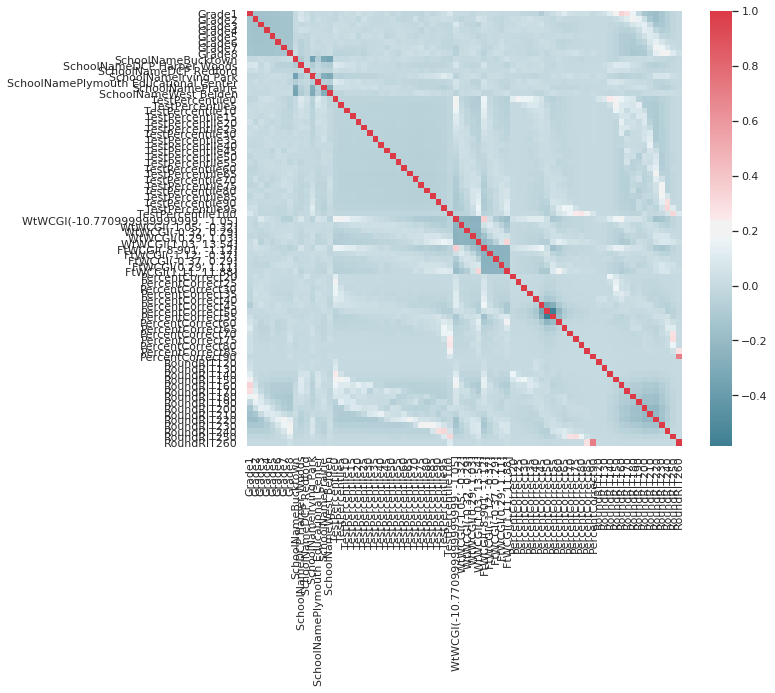

In [51]:
import numpy as np
pp.corr_matrix(read)

# Machine Learning

For math

In [0]:
#Creating the binary y variable for machine learning
math['Y'] = np.where(md['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

In [68]:
# Finding Base Probability of Not Grow in math
print ('Prob of Not grow')
print (math['Y'].sum()/math.shape[0])

Prob of Not grow
0.37549171534151865


In [0]:
indepv = list(math.columns)
indepv.remove('Y')

In [56]:
md.TermName.unique()

array(['Winter 2012-2013', 'Winter 2011-2012', 'Winter 2018-2019',
       'Winter 2017-2018', 'Winter 2013-2014', 'Winter 2014-2015',
       'Winter 2015-2016', 'Winter 2016-2017', 'Winter 2019-2020'],
      dtype=object)

In [0]:
from sklearn.model_selection import train_test_split
x = math[indepv]
y = math['Y']  

In [0]:
x_train = x[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')]
y_train = y[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')]
x_val = x[md.TermName=='Winter 2018-2019']
y_val = y[md.TermName=='Winter 2018-2019']
x_test = x[md.TermName=='Winter 2019-2020']
y_test = y[md.TermName=='Winter 2019-2020']

In [59]:
x_test.shape

(2346, 76)

In [0]:
clfs = {'RF': RandomForestClassifier(),
    'Boost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)),
    'Logit': LogisticRegression(),
    'SVM': SVC(probability=True, random_state=0),
    'Tree': DecisionTreeClassifier(),
    'Bag': BaggingClassifier(),
    'KNN': KNeighborsClassifier(),
    'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
    'NB': GaussianNB()}


small_grid = {'RF':{'n_estimators': [10,100], 'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10]},
    'Boost': {'algorithm': ['SAMME', 'SAMME.R'], 'n_estimators': [1,10,100,1000]},
    'Logit': {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10]},
    'SVM' :{'C' :[0.01,0.1,1,10],'kernel':['linear']},
    'Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [5,10,20,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,5]},
    'Bag':{'n_estimators':[1,10,20,50], 'max_samples':[5,10], 'max_features': [5,10]},
    'KNN' :{'n_neighbors': [1,10,50],'weights': ['uniform','distance'],'algorithm': ['auto']},
    'ET': {'n_estimators': [10,100], 'criterion' : ['gini', 'entropy'] ,'max_depth': [5,50], 'max_features': ['sqrt','log2'],'min_samples_split': [2,10], 'n_jobs': [-1]},
    'NB' : {}}

In [60]:
x_val.shape

(2284, 76)

In [61]:
x_train.shape

(5144, 76)

In [0]:
def slicedict(d, s):
    return {k:v for k,v in d.items() if k==s}

In [0]:
results = final.clf_loop(["RF",'Bag','Boost', 'ET', 'Tree'], x_train, x_val, y_train, y_val)

In [64]:
best = final.best_grid(results)

,model_type,parameters,accuracy,auc-roc,precision,time
24,Bag,"{'max_features': 10, 'max_samples': 5, 'n_esti...",0.616900,0.601339,0.464922,0.006838
34,Boost,"{'algorithm': 'SAMME', 'n_estimators': 100}",0.630911,0.664504,0.550208,0.636511
61,ET,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.643608,0.674409,0.563501,0.448255
5,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.642732,0.665310,0.556973,0.308156
91,Tree,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.638792,0.632496,0.498638,0.006785


In [0]:
#Select the best classifer for math
mclf = slicedict(best, 'ET')

In [66]:
!pip3 install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394152 sha256=ad279b98f83770678f51eec6b2965532b9ff1605c77e0a203bbeacc6e1e8c249
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


Feature ranking for Y
1. Grade7 (0.155788)
2. WtWCGI(-10.770999999999999, -1.03] (0.090728)
3. FtWCGI(-8.901, -1.15] (0.058138)
4. WtWCGI(1.04, 13.54] (0.057389)
5. RoundRIT240 (0.048760)
6. RoundRIT230 (0.047488)
7. Grade3 (0.041936)
8. RoundRIT190 (0.038585)
9. TestPercentile95 (0.038404)
10. TestPercentile10 (0.030013)
11. Grade1 (0.028753)
12. RoundRIT200 (0.021868)
13. Grade2 (0.021135)
14. RoundRIT260 (0.020968)
15. TestPercentile5 (0.015984)
16. Grade4 (0.014438)
17. SchoolNameIrving Park (0.013774)
18. SchoolNameWest Belden (0.013226)
19. RoundRIT250 (0.012990)
20. TestPercentile100 (0.012852)


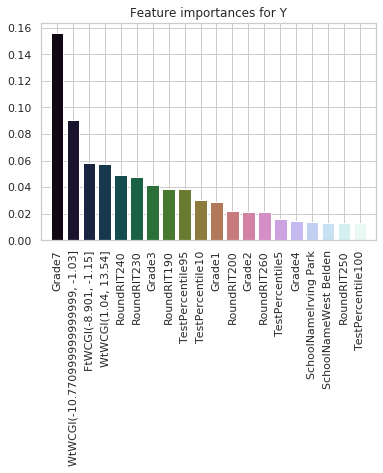

In [0]:
final.feature_importance(x_train, y_train, best, "ET", 20)

For reading


In [0]:
#Creating the binary y variable for machine learning
read['Y'] = np.where(rd['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)

In [196]:
# Finding Base Probability of not grow in Reading
print ('Prob of not grow')
print ( read['Y'].sum()/read.shape[0])

Prob of not grow
0.34182666427417907


In [0]:
indepv = list(read.columns)
indepv.remove('Y')

In [0]:
xr = read[indepv]
yr = read['Y']  

In [0]:
x_trainr = xr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')]
y_trainr = yr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')]
x_vr = xr[rd.TermName=='Winter 2018-2019']
y_vr = yr[rd.TermName=='Winter 2018-2019']
x_testr = xr[rd.TermName=='Winter 2019-2020']
y_testr = yr[rd.TermName=='Winter 2019-2020']

In [0]:
resultr = final.clf_loop(["RF",'Bag','Boost', 'ET', 'KNN','Tree'], x_trainr, x_vr, y_trainr, y_vr)

In [202]:
bestr = final.best_grid(resultr)

,model_type,parameters,accuracy,auc-roc,precision,time
29,Bag,"{'max_features': 10, 'max_samples': 10, 'n_est...",0.617929,0.586145,0.444104,0.030658
35,Boost,"{'algorithm': 'SAMME', 'n_estimators': 1000}",0.664926,0.673075,0.563434,6.528371
62,ET,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.675805,0.689780,0.587738,0.316116
76,KNN,"{'algorithm': 'auto', 'n_neighbors': 50, 'weig...",0.642733,0.663331,0.551233,3.932641
5,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.663185,0.692072,0.579939,0.333595
79,Tree,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.654047,0.644622,0.488429,0.007004


In [0]:
rclf = slicedict(bestr, 'RF')

Feature ranking for Y
1. WtWCGI(-10.770999999999999, -1.05] (0.121946)
2. Grade3 (0.103897)
3. WtWCGI(1.03, 13.54] (0.055124)
4. Grade7 (0.053814)
5. RoundRIT230 (0.049540)
6. SchoolNamePrairie (0.041368)
7. RoundRIT160 (0.040769)
8. TestPercentile0 (0.034090)
9. TestPercentile80 (0.029535)
10. RoundRIT220 (0.029255)
11. RoundRIT240 (0.029033)
12. TestPercentile85 (0.024393)
13. FtWCGI(-8.901, -1.12] (0.023731)
14. TestPercentile5 (0.022222)
15. Grade4 (0.016921)
16. Grade6 (0.014936)
17. SchoolNameBucktown (0.012367)
18. TestPercentile10 (0.011932)
19. WtWCGI(-1.05, -0.32] (0.011429)
20. RoundRIT250 (0.011333)


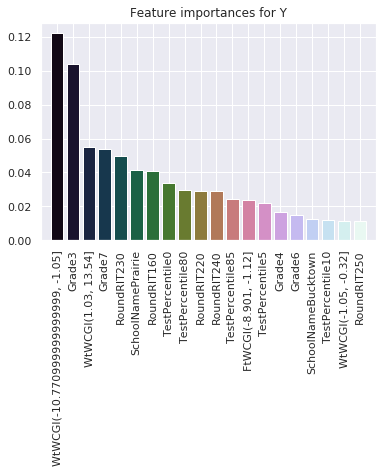

In [204]:
final.feature_importance(x_trainr, y_trainr, bestr, "RF", 20)

In [0]:
def Predicting(x_train,  y_train, test, grid):
    models = []
    for row in grid:
        models.append(row)
        
    for index, clf in enumerate([clfs[x] for x in models]):
        model_params = grid[models[index]]
        for p in ParameterGrid(model_params):
                clf.set_params(**p)
    model = clf.fit(x_train, y_train)
    rv = clf.fit(x_train, y_train).predict_proba(test)[:,1]
                  
    return model, rv

# Predicting 2019-2020 math

In [205]:
x_test.head()

,Grade1,Grade2,Grade3,Grade4,Grade5,Grade6,Grade7,Grade8,SchoolNameBucktown,SchoolNameDCP Harper Woods,SchoolNameDCP Redford,SchoolNameIrving Park,SchoolNamePlymouth Educational Center,SchoolNamePrairie,SchoolNameWest Belden,TestPercentile0,TestPercentile5,TestPercentile10,TestPercentile15,TestPercentile20,TestPercentile25,TestPercentile30,TestPercentile35,TestPercentile40,TestPercentile45,TestPercentile50,TestPercentile55,TestPercentile60,TestPercentile65,TestPercentile70,TestPercentile75,TestPercentile80,TestPercentile85,TestPercentile90,TestPercentile95,TestPercentile100,"WtWCGI(-10.770999999999999, -1.05]","WtWCGI(-1.05, -0.32]","WtWCGI(-0.32, 0.29]","WtWCGI(0.29, 1.03]","WtWCGI(1.03, 13.54]","FtWCGI(-8.901, -1.12]","FtWCGI(-1.12, -0.37]","FtWCGI(-0.37, 0.29]","FtWCGI(0.29, 1.11]","FtWCGI(1.11, 11.88]",PercentCorrect25,PercentCorrect30,PercentCorrect35,PercentCorrect40,PercentCorrect45,PercentCorrect50,PercentCorrect55,PercentCorrect60,PercentCorrect65,PercentCorrect70,PercentCorrect75,PercentCorrect80,PercentCorrect85,RoundRIT110,RoundRIT130,RoundRIT140,RoundRIT150,RoundRIT160,RoundRIT170,RoundRIT180,RoundRIT190,RoundRIT200,RoundRIT210,RoundRIT220,RoundRIT230,RoundRIT240,RoundRIT250,RoundRIT260,RoundRIT270,RoundRIT280
587,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
600,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
601,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
603,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
xmath = x[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')|(md.TermName=='Winter 2018-2019')]
ymath = y[(md.TermName=='Winter 2017-2018')|(md.TermName=='Winter 2016-2017')|(md.TermName=='Winter 2015-2016')|(md.TermName=='Winter 2018-2019')]

In [144]:
xmath.shape

(7428, 76)

In [0]:
mmodel, pred2020 =Predicting(xmath, ymath, x_test, mclf)

In [0]:
math2020 = test2020[test2020.Discipline=='Mathematics']

In [181]:
math2020['math_pred']=pred2020


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [182]:
math2020.tail()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI,math_pred
3213,Winter 2019-2020,50593220,Bucktown,2,Mathematics,40,1.51,-2.57,50,181,180,"(1.11, 11.88]","(-10.770999999999999, -1.05]",0.512869
3214,Winter 2019-2020,50730806,Bucktown,2,Mathematics,45,-0.68,-0.72,40,182,180,"(-1.12, -0.37]","(-1.05, -0.32]",0.468292
3215,Winter 2019-2020,50433407,West Belden,2,Mathematics,20,0.21,-2.15,55,173,170,"(-0.37, 0.29]","(-10.770999999999999, -1.05]",0.521567
3216,Winter 2019-2020,50470694,West Belden,2,Mathematics,45,0.93,0.24,50,183,180,"(0.29, 1.11]","(-0.32, 0.29]",0.470668
3217,Winter 2019-2020,50578551,West Belden,2,Mathematics,40,-0.90,-0.93,50,181,180,"(-1.12, -0.37]","(-1.05, -0.32]",0.472488


In [0]:
math2020 =math2020.sort_values(by=['math_pred'], ascending=False)

In [186]:
math2020.shape[0]*0.4

938.4000000000001

In [188]:
math2020.columns

Index(['TermName', 'StudentID', 'SchoolName', 'Grade', 'Discipline',
       'TestPercentile', 'FalltoWinterConditionalGrowthIndex',
       'WintertoWinterConditionalGrowthIndex', 'PercentCorrect',
       'TestRITScore', 'RoundRIT', 'FtWCGI', 'WtWCGI', 'math_pred'],
      dtype='object')

In [0]:
features_to_see = [ 'SchoolName', 'Grade','TestPercentile','PercentCorrect','RoundRIT', 'FtWCGI', 'WtWCGI']

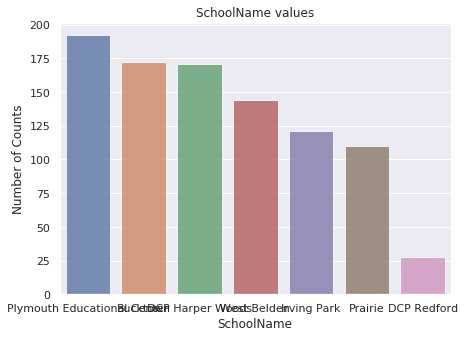

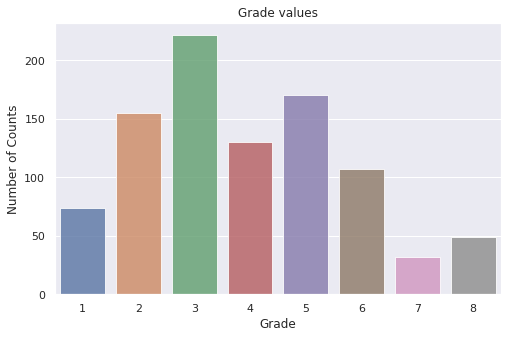

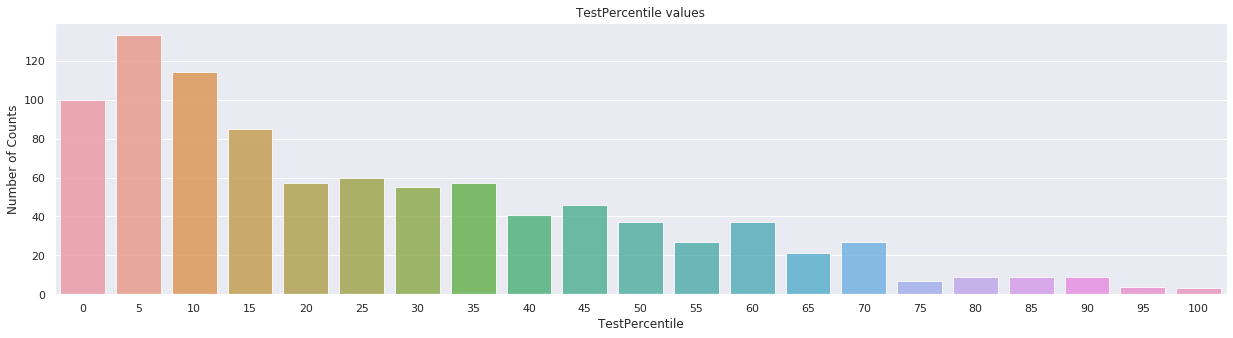

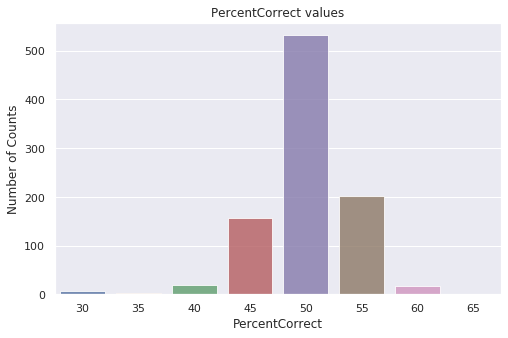

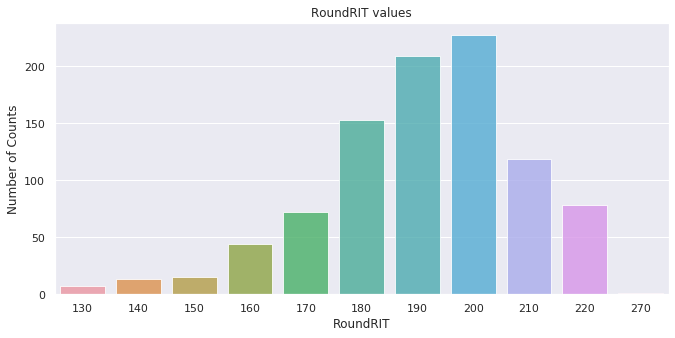

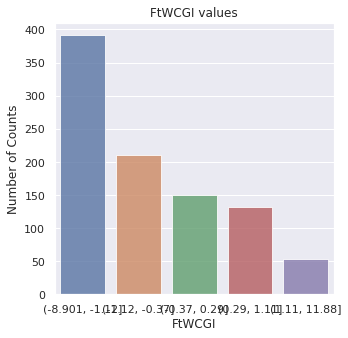

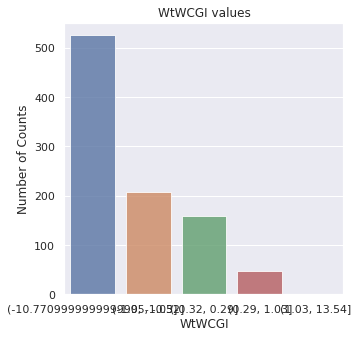

In [192]:
plot_df(math2020[:938], features_to_see, save=False)

# Predicting 2019-2020 Reading

In [0]:
xread = xr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')|(rd.TermName=='Winter 2018-2019')]
yread = yr[(rd.TermName=='Winter 2017-2018')|(rd.TermName=='Winter 2016-2017')|(rd.TermName=='Winter 2015-2016')|(rd.TermName=='Winter 2018-2019')]


In [208]:
x_testr.shape

(2282, 76)

In [0]:
rmodel, pred2020r =Predicting(xread, yread, x_testr, rclf)

In [0]:
read2020 = test2020[test2020.Discipline=='Reading']

In [212]:
read2020['read_pred']=pred2020r


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [213]:
read2020.head()

,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI,read_pred
0,Winter 2019-2020,2909817682,Plymouth Educational Center,7,Reading,80,0.62,0.10,50,229,230,"(0.29, 1.11]","(-0.32, 0.29]",0.300933
1,Winter 2019-2020,3496323659,Plymouth Educational Center,8,Reading,55,-0.23,-0.94,55,222,220,"(-0.37, 0.29]","(-1.05, -0.32]",0.355958
2,Winter 2019-2020,1502579005,Plymouth Educational Center,8,Reading,60,-0.52,-0.01,45,223,220,"(-1.12, -0.37]","(-0.32, 0.29]",0.361235
3,Winter 2019-2020,172550261,Plymouth Educational Center,8,Reading,50,-0.13,-0.73,50,219,220,"(-0.37, 0.29]","(-1.05, -0.32]",0.361744
4,Winter 2019-2020,1974001148,Plymouth Educational Center,7,Reading,55,0.27,-0.72,55,218,220,"(-0.37, 0.29]","(-1.05, -0.32]",0.319381


In [0]:
read2020 =read2020.sort_values(by=['read_pred'], ascending=False)

In [215]:
read2020.shape[0]*0.4

912.8000000000001

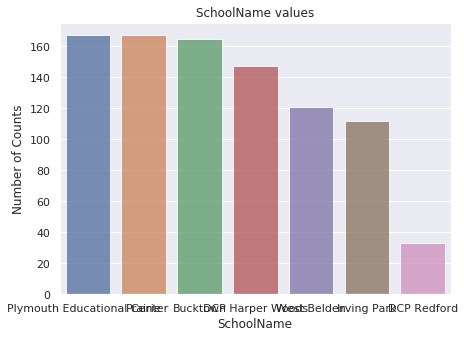

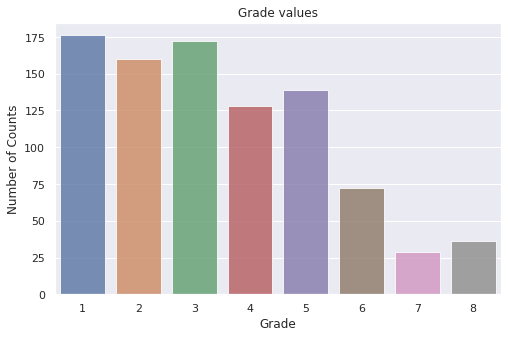

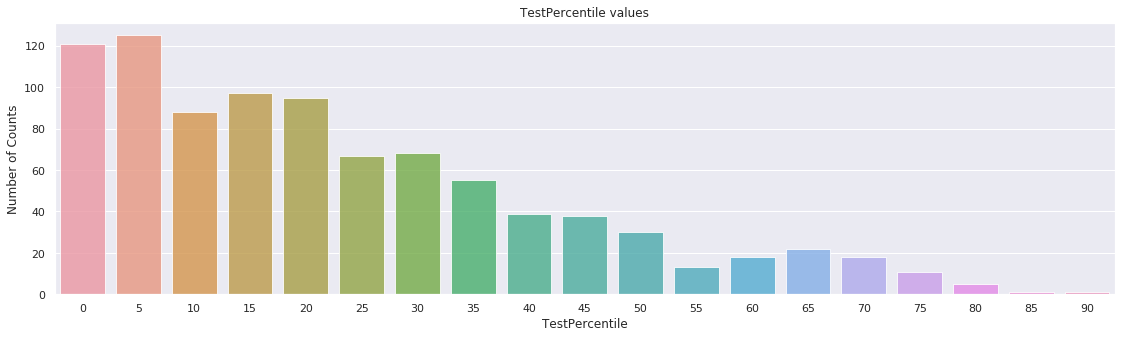

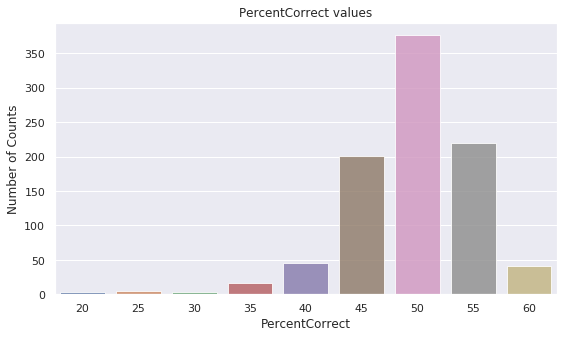

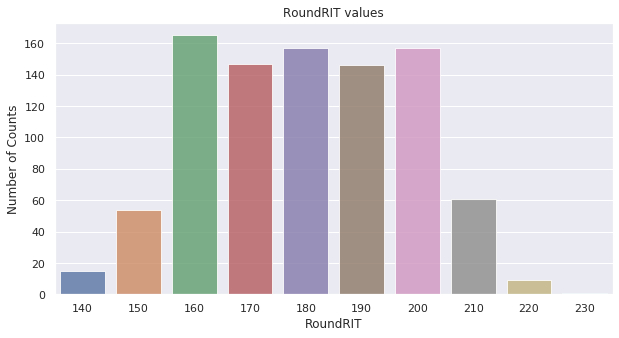

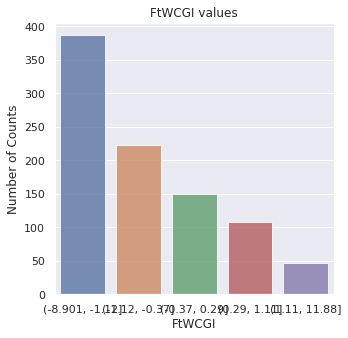

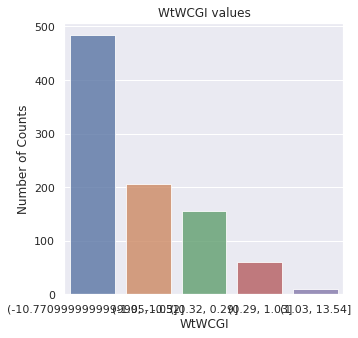

In [216]:
plot_df(read2020[:912], features_to_see, save=False)

In [0]:
math2020.to_csv('math_pred.csv', index=False)

In [225]:
math.head()

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
31,43273221,8,Mathematics,22.0,Winter 2012-2013,West Belden,90,0.65,0.95,55,252,250,"(0.29, 1.11]","(0.29, 1.03]"
32,43050370,8,Mathematics,19.0,Winter 2012-2013,West Belden,85,1.86,2.41,50,250,250,"(1.11, 11.88]","(1.03, 13.54]"
33,44277530,6,Mathematics,17.0,Winter 2012-2013,Bucktown,90,-1.51,-0.30,50,241,240,"(-8.901, -1.12]","(-0.32, 0.29]"
34,43345087,8,Mathematics,20.0,Winter 2012-2013,West Belden,80,-0.62,-0.75,50,245,240,"(-1.12, -0.37]","(-1.05, -0.32]"
35,43371657,8,Mathematics,13.0,Winter 2012-2013,West Belden,85,1.14,0.62,50,247,250,"(1.11, 11.88]","(0.29, 1.03]"


In [0]:
read2020.to_csv('reading_pred.csv', index=False)

In [0]:
math = rv[rv.Discipline=='Mathematics']

In [228]:
math[math.StudentID=='50237118']

,StudentID,Grade,Discipline,SpringtoSpringConditionalGrowthPercentile,TermName,SchoolName,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
5964,50237118,4,Mathematics,1.0,Winter 2018-2019,Prairie,30,0.36,0.53,50,200,200,"(0.29, 1.11]","(0.29, 1.03]"
5965,50237118,4,Mathematics,1.0,Winter 2018-2019,Prairie,30,0.36,0.53,50,200,200,"(0.29, 1.11]","(0.29, 1.03]"


# Testing different threshold

In [0]:
predy

array([0.45534996, 0.55737705, 0.47120419, ..., 0.39622642, 0.45534996,
       0.45534996])

In [0]:
x_test.head()

,Grade1,Grade2,Grade3,Grade4,Grade5,Grade6,Grade7,Grade8,SchoolNameBucktown,SchoolNameDCP Harper Woods,SchoolNameDCP Redford,SchoolNameIrving Park,SchoolNamePlymouth Educational Center,SchoolNamePrairie,SchoolNameWest Belden,TestPercentile0,TestPercentile5,TestPercentile10,TestPercentile15,TestPercentile20,TestPercentile25,TestPercentile30,TestPercentile35,TestPercentile40,TestPercentile45,TestPercentile50,TestPercentile55,TestPercentile60,TestPercentile65,TestPercentile70,TestPercentile75,TestPercentile80,TestPercentile85,TestPercentile90,TestPercentile95,TestPercentile100,"WtWCGI(-10.770999999999999, -1.05]","WtWCGI(-1.05, -0.31]","WtWCGI(-0.31, 0.3]","WtWCGI(0.3, 1.04]","WtWCGI(1.04, 13.54]","FtWCGI(-8.901, -1.12]","FtWCGI(-1.12, -0.37]","FtWCGI(-0.37, 0.3]","FtWCGI(0.3, 1.12]","FtWCGI(1.12, 11.88]",PercentCorrect25,PercentCorrect30,PercentCorrect35,PercentCorrect40,PercentCorrect45,PercentCorrect50,PercentCorrect55,PercentCorrect60,PercentCorrect65,PercentCorrect70,PercentCorrect75,PercentCorrect80,PercentCorrect85,RoundRIT110,RoundRIT130,RoundRIT140,RoundRIT150,RoundRIT160,RoundRIT170,RoundRIT180,RoundRIT190,RoundRIT200,RoundRIT210,RoundRIT220,RoundRIT230,RoundRIT240,RoundRIT250,RoundRIT260,RoundRIT270,RoundRIT280
587,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
600,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
601,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
602,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
603,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Vizualize the tree

In [0]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)
clf = clf.fit(X=train_x, y=train_y)

sklearn.tree._classes.DecisionTreeClassifier

In [0]:
import graphviz 
from sklearn import tree
from graphviz import Source

# Visualization
features = list(x_train.columns)
dot_data = tree.export_graphviz(mmodel, out_file=None, feature_names=features, 
                                filled=True, rounded=True, special_characters=True, )  
graph = graphviz.Source(dot_data)
graph

In [0]:
mmodel

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [84]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

In [85]:
explainer = shap.TreeExplainer(mmodel)
shap_values = explainer.shap_values(x_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


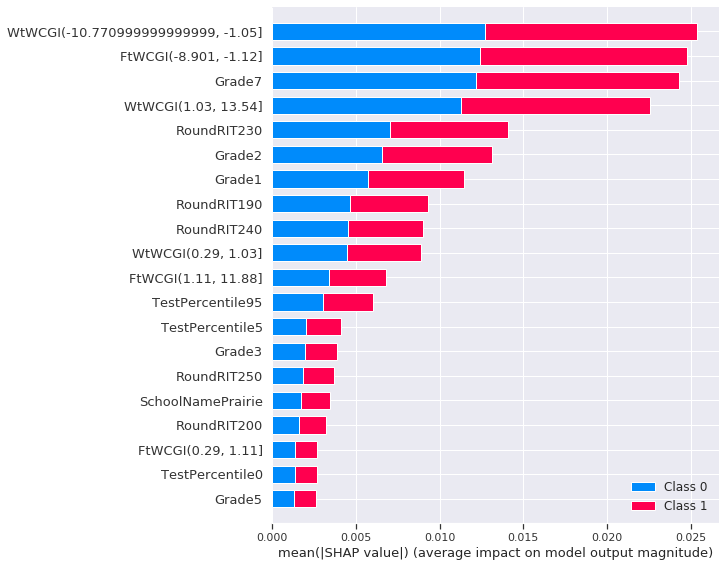

In [86]:
shap.summary_plot(shap_values, features=x, feature_names=x.columns)

In [95]:
predy

array([0.5743416 , 0.49483957, 0.53796123, ..., 0.41773347, 0.5081275 ,
       0.5081275 ])

In [0]:
My =pd.DataFrame(predy, columns=['math_pred'])

In [0]:
#bin the waittime by 10 categories
BINS = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
LABELS = range(10)
My['bin']=pd.cut(My['pred'], bins=BINS, labels = LABELS)


In [94]:
My.head()

,math_pred,TermName,StudentID,SchoolName,Grade,Discipline,TestPercentile,FalltoWinterConditionalGrowthIndex,WintertoWinterConditionalGrowthIndex,PercentCorrect,TestRITScore,RoundRIT,FtWCGI,WtWCGI
0,0.574342,Winter 2019-2020,2909817682,Plymouth Educational Center,7,Reading,80,0.62,0.10,50,229,230,"(0.29, 1.11]","(-0.32, 0.29]"
1,0.494840,Winter 2019-2020,3496323659,Plymouth Educational Center,8,Reading,55,-0.23,-0.94,55,222,220,"(-0.37, 0.29]","(-1.05, -0.32]"
2,0.537961,Winter 2019-2020,1502579005,Plymouth Educational Center,8,Reading,60,-0.52,-0.01,45,223,220,"(-1.12, -0.37]","(-0.32, 0.29]"
3,0.528034,Winter 2019-2020,172550261,Plymouth Educational Center,8,Reading,50,-0.13,-0.73,50,219,220,"(-0.37, 0.29]","(-1.05, -0.32]"
4,0.536356,Winter 2019-2020,1974001148,Plymouth Educational Center,7,Reading,55,0.27,-0.72,55,218,220,"(-0.37, 0.29]","(-1.05, -0.32]"


In [0]:
math_at_risk_student = My[My.pred >= .35]

In [0]:
math_at_risk_student.shape[0]/My.shape[0]

0.40881590319792566

# Cross validation

In [0]:
mmodel, predy =Predicting(x_train, y_train, x_val, mclf)

In [0]:
My =pd.DataFrame(predy, columns=['math_pred'])

In [100]:
#Creating the binary y variable for machine learning
md['Y'] = np.where(md['SpringtoSpringConditionalGrowthPercentile']<= 40, 1, 0)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
true_y = md[md.TermName=='Winter 2018-2019']

In [0]:
true_y =true_y[['SpringtoSpringConditionalGrowthPercentile', 'Y']]

In [103]:
true_y.head()

,SpringtoSpringConditionalGrowthPercentile,Y
2362,9.0,1
2363,21.0,1
2364,1.0,1
2365,3.0,1
2366,7.0,1


In [114]:
#Potential baseline
md['SpringtoSpringConditionalGrowthPercentile'].median()

47.0

In [0]:
'''
#bins pred_y by 10% of the data
PBINS = [0,10,20,30,40,50,60,70,80,90,100]
LABELS = range(10)
#bin the waittime by 10 categories
true_y['Sbin']=pd.cut(true_y['SpringtoSpringConditionalGrowthPercentile'], bins=PBINS, labels = LABELS)

In [0]:
true_y=true_y.reset_index(drop=True)

In [110]:
true_y.head()

,SpringtoSpringConditionalGrowthPercentile,Y
0,9.0,1
1,21.0,1
2,1.0,1
3,3.0,1
4,7.0,1


In [0]:
My = pd.concat([My, true_y], axis=1)

In [112]:
My.head()

,math_pred,SpringtoSpringConditionalGrowthPercentile,Y
0,0.574342,9.0,1
1,0.494840,21.0,1
2,0.537961,1.0,1
3,0.528034,3.0,1
4,0.536356,7.0,1


In [117]:
md['SpringtoSpringConditionalGrowthPercentile'].mean()/100

0.48298641906873613

In [138]:
#Potential baseline
base = md['SpringtoSpringConditionalGrowthPercentile'].median()/100
print('cutoff is ', base)
My['pred']= np.where(predy>= base, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :')
print(accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted share of Not grow', My['pred'].sum()/My.shape[0])

cutoff is  0.47
[[899 468]
 [374 543]]
Accuracy Score :
0.6313485113835376
Report :
              precision    recall  f1-score   support

           0       0.71      0.66      0.68      1367
           1       0.54      0.59      0.56       917

    accuracy                           0.63      2284
   macro avg       0.62      0.62      0.62      2284
weighted avg       0.64      0.63      0.63      2284

The predicted share of Not grow 0.4426444833625219


I am chosing .42 as the cutoff for maths, since we can get a recall of 87%. The predicted share of Not grow is .77

In [137]:
My['pred']= np.where(predy>= .42, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :')
print(accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted share of Not grow', My['pred'].sum()/My.shape[0])

[[398 969]
 [119 798]]
Accuracy Score :
0.5236427320490368
Report :
              precision    recall  f1-score   support

           0       0.77      0.29      0.42      1367
           1       0.45      0.87      0.59       917

    accuracy                           0.52      2284
   macro avg       0.61      0.58      0.51      2284
weighted avg       0.64      0.52      0.49      2284

The predicted share of Not grow 0.7736427320490368


In [0]:
#       Predict 0   1
# Actual
#   0          TN  FP
#   1          FN  TP

In [141]:
My.shape

(2284, 4)

In [130]:
My['pred']= np.where(predy>= .35, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :')
print(accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))
print ('The predicted share of Not grow', My['pred'].sum()/My.shape[0])

[[  82 1285]
 [   8  909]]
Accuracy Score :
0.4338879159369527
Report :
              precision    recall  f1-score   support

           0       0.91      0.06      0.11      1367
           1       0.41      0.99      0.58       917

    accuracy                           0.43      2284
   macro avg       0.66      0.53      0.35      2284
weighted avg       0.71      0.43      0.30      2284

The predicted share of Not grow 0.9605954465849387


In [120]:
My['pred']= np.where(predy>= .3, 1, 0)
print(confusion_matrix(My['Y'], My['pred'])) 
print('Accuracy Score :')
print(accuracy_score(My['Y'], My['pred']) )
print('Report :' )
print(classification_report(My['Y'], My['pred']))


[[   5 1362]
 [   1  916]]
Accuracy Score :
0.4032399299474606
Report :
              precision    recall  f1-score   support

           0       0.83      0.00      0.01      1367
           1       0.40      1.00      0.57       917

    accuracy                           0.40      2284
   macro avg       0.62      0.50      0.29      2284
weighted avg       0.66      0.40      0.23      2284



In [123]:
# Finding Base Probability of Not Grow in math
print ('Prob of Not grow')
print (math['Y'].sum()/math.shape[0])

Prob of Not grow
0.37549171534151865


# Reading

In [0]:
rmodel , pred_y =Predicting(x_trainr, y_trainr, x_testr, rclf)

In [0]:
explainerr = shap.TreeExplainer(rmodel)
shap_valuesr = explainer.shap_values(x_trainr)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


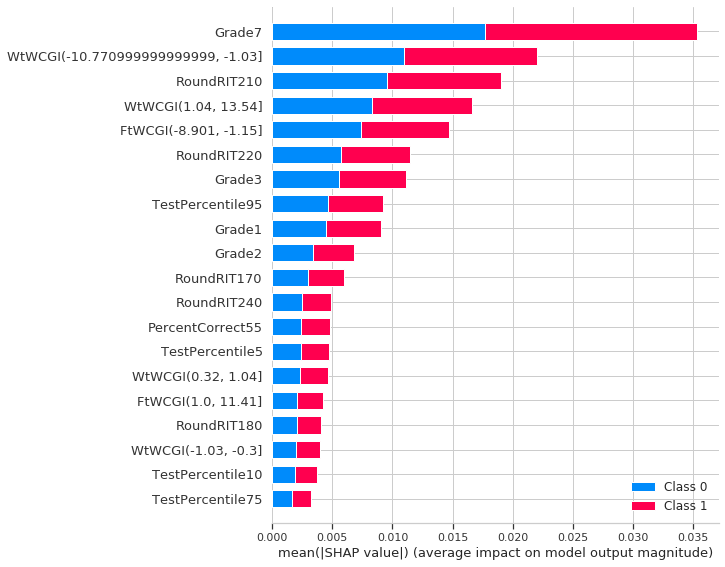

In [0]:
shap.summary_plot(shap_valuesr, features=x_trainr, feature_names=x_trainr.columns)

In [0]:
pred_y

array([0.50879735, 0.43981017, 0.39925117, ..., 0.49496976, 0.3341693 ,
       0.41859676])

In [0]:
py =pd.DataFrame(pred_y, columns=['pred'])

In [0]:
py.head()

,pred
0,0.508797
1,0.439810
2,0.399251
3,0.496758
4,0.424318


In [0]:
true_yr = rd[rd.TermName=='Winter 2018-2019']

In [0]:
#bins pred_y by 10% of the data

BINS = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
#bin the waittime by 10 categories
true_yr['Sbin']=pd.cut(true_yr['SpringtoSpringConditionalGrowthPercentile'], bins=PBINS, labels = LABELS)

In [0]:
true_yr =true_yr[['SpringtoSpringConditionalGrowthPercentile', 'Y','Sbin']]

In [0]:
true_yr=true_yr.reset_index(drop=True)

In [0]:
true_yr.head()

,SpringtoSpringConditionalGrowthPercentile,Y,Sbin
0,15.0,1,1
1,2.0,1,0
2,15.0,1,1
3,1.0,1,0
4,4.0,1,0


In [0]:
py = pd.concat([py, true_yr], axis=1)

In [0]:
pred_y

array([0.52257251, 0.46288064, 0.3932089 , ..., 0.49792087, 0.35623408,
       0.39965456])

In [0]:
py.head()

,pred,SpringtoSpringConditionalGrowthPercentile,Y,Sbin
0,0.508797,15.0,1,1
1,0.439810,2.0,1,0
2,0.399251,15.0,1,1
3,0.496758,1.0,1,0
4,0.424318,4.0,1,0


In [0]:
pred_y.min()

0.23339883940209635

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
#Optimize for recall
tn, fp, fn, tp = confusion_matrix(py['Y'], py['pred']).ravel()
print('Recall :', tp/(fn+tp))
print('Precision :', tp/(fp+tp))

Recall : 0.5495915985997666
Precision : 0.521594684385382


In [0]:
py['pred']= np.where(pred_y>= .4, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :')
print(accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))

[[924 517]
 [302 555]]
Accuracy Score :
0.643603133159269
Report :
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1441
           1       0.52      0.65      0.58       857

    accuracy                           0.64      2298
   macro avg       0.64      0.64      0.63      2298
weighted avg       0.67      0.64      0.65      2298



In [0]:
py['pred']= np.where(pred_y>= .3, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :')
print(accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))

[[  88 1353]
 [  23  834]]
Accuracy Score :
0.4012184508268059
Report :
              precision    recall  f1-score   support

           0       0.79      0.06      0.11      1441
           1       0.38      0.97      0.55       857

    accuracy                           0.40      2298
   macro avg       0.59      0.52      0.33      2298
weighted avg       0.64      0.40      0.28      2298



In [0]:
py['pred']= np.where(pred_y>= .29, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :')
print(accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))

[[  61 1380]
 [  17  840]]
Accuracy Score :
0.39208006962576153
Report :
              precision    recall  f1-score   support

           0       0.78      0.04      0.08      1441
           1       0.38      0.98      0.55       857

    accuracy                           0.39      2298
   macro avg       0.58      0.51      0.31      2298
weighted avg       0.63      0.39      0.25      2298



In [0]:
py['pred']= np.where(pred_y>= .28, 1, 0)
print(confusion_matrix(py['Y'], py['pred'])) 
print('Accuracy Score :')
print(accuracy_score(py['Y'], py['pred']) )
print('Report :' )
print(classification_report(py['Y'], py['pred']))

[[  32 1409]
 [  11  846]]
Accuracy Score :
0.38207136640557005
Report :
              precision    recall  f1-score   support

           0       0.74      0.02      0.04      1441
           1       0.38      0.99      0.54       857

    accuracy                           0.38      2298
   macro avg       0.56      0.50      0.29      2298
weighted avg       0.61      0.38      0.23      2298



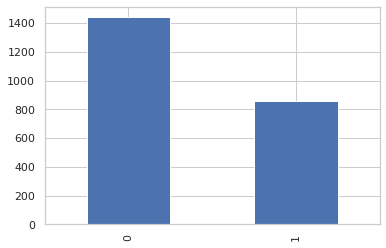

In [0]:
py['Y'].value_counts().plot.bar()

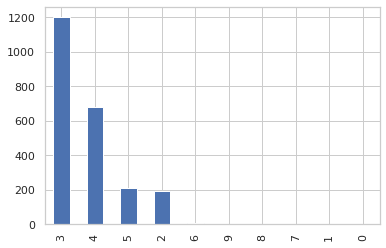

In [0]:
py['bin'].value_counts().plot.bar()

#Previous code

In [0]:
def logit(x_train, x_test, y_train, y_test):
    '''
    Run logit regression and print out the scores for comparison
    '''

    # get train/test data
     
    log = linear_model.LogisticRegression()
    log_model = log.fit(x_train, y_train)
    predictions = log_model.predict(x_test)

    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()

    print('Logit Score test + train:', log_model.score(x_test, y_test), log_model.score(x_train, y_train))

In [0]:
def feature_importance(x_train, y_train, clf, k=10):
    '''
    Based on the best grid for each classifer, print out the 
    top k important features
    '''

    indepv = list(x_train.columns)
    importances = clf.feature_importances_
    current_palette = sns.color_palette(sns.color_palette("cubehelix", k))
    
    indices = np.argsort(importances)[::-1]
    indices = indices[:k]

    # Print the feature ranking
    print("Feature ranking for %s" % (y_train.name))

    labels_arr = []
    for f in range(len(indices)):
        label = indepv[indices[f]]
        labels_arr.append(label)
        print("%d. %s (%f)" % (f+1, label, importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances for %s" % (y_train.name))
    plt.bar(range(len(indices)), importances[indices], align="center", tick_label = labels_arr, color= current_palette)
    plt.xlim([-1, len(indices)])
    plt.xticks(range(len(indices)),labels_arr, rotation = 'vertical')
    plt.show()
    return

In [0]:
def rf(x_train, x_test, y_train, y_test):
    '''
    Generate the random forest model using existing dataset
    Returns: (None)
       Save the random forest model using pickle
    
    '''
    rf_model = RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=10, n_estimators=10)
    rf_model.fit(x_train, y_train)
    predictions =  rf_model.predict(x_test)
    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()
    print(rf_model)
    print('RandomForest Score:',  rf_model.score(x_test, y_test),  rf_model.score(x_train, y_train))
    return rf_model


In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors.kde import KernelDensity
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def ols(x_train, x_test, y_train, y_test):
    '''
    Run ols regression and print out the scores for comparison
    '''
    # fit a OLS model
    ols = linear_model.LinearRegression()
    ols_model = ols.fit(x_train, y_train)
    predictions = ols.predict(x_test)

    # plot
    plt.scatter(y_test, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.axis()
    plt.show()

    print('OLS Score:', ols_model.score(x_test, y_test), ols_model.score(x_train, y_train))
    #return predictions, x_test, y_test